## Kernels

- Kernels são filtros convolucionais. Na prática são arrays n-dimensionais que são operados com o dado através da convolução.
- Os pesos do kernel, ou seja, os elementos do array, carregam o padrão que será procurado no dado original.
- Esses filtos podem ser manualmente projetados se já sabemos o padrão que queremos procurar, ou o mapa de ativação desejado.

Agora, vamos ver alguns kernels convolucionais e a intuição por trás do padrão que eles projetam.

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from scipy.signal import convolve
%matplotlib inline

In [66]:
def imprime(img, kernel, resultado, titulo):
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    plot = [img, kernel, resultado]
    titulos = ["Imagem", titulo, "Mapa de Ativação"]
    for k, ax in enumerate(axs):
        ax.imshow(plot[k], cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(titulos[k])
    for i, line in enumerate(kernel):
        for j, col in enumerate(line):
            axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

def imprime_kernel(valores, titulo):
    plt.figure(figsize=(len(valores), len(valores)))
    plt.imshow(valores, cmap='gray')
    for i, line in enumerate(valores):
        for j, col in enumerate(line):
            plt.text(j, i, '{:.2f}'.format(col), fontsize=16, color='red', ha='center', va='center')
    plt.title(titulo)
    plt.xticks([])
    plt.yticks([])

### Imagem de exemplo

In [ ]:
!wget https://avatars.githubusercontent.com/u/14804387?v=4

--2021-10-05 23:22:04--  https://avatars.githubusercontent.com/u/14804387?v=4
Resolving avatars.githubusercontent.com (avatars.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to avatars.githubusercontent.com (avatars.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13163 (13K) [image/jpeg]
Saving to: ‘14804387?v=4’

14804387?v=4        100%[===================>]  12.85K  --.-KB/s    in 0s      

2021-10-05 23:22:04 (71.0 MB/s) - ‘14804387?v=4’ saved [13163/13163]



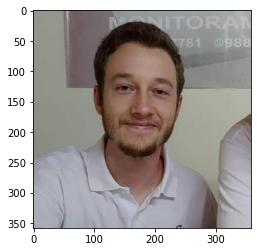

In [ ]:
img = io.imread('14804387?v=4')
plt.imshow(img)

In [ ]:
img.shape

(358, 358, 3)

A imagem possui 358x358 pixels e 3 canais de cor, porém vamos utilizar apenas o canal Vermelho em escalas de cinza por enquanto:

Formato: (358, 358)


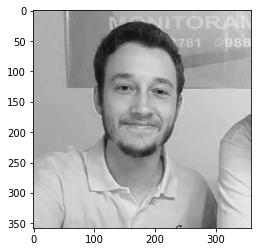

In [ ]:
img = img[:, :, 0] # o canal 0 é o vermelho (R G B)
print("Formato:", img.shape)
plt.imshow(img, cmap='gray') 

# Filtro da Média

Ao aplicar esse filtro em uma imagem, o mapa de ativação resultante será uma versão suavizada da imagem original (borrada). Esse filtro é alcançado explorando a operação de convolução para **tirar a média dos pixels** de subregiões da imagem.

O kernel para esse tipo de filtro pode possuir n valores, com cada valor sendo 1/n. Ou seja, um kernel 3x3 terá seus valores 1/9:

        |-----------------|
        | 1/9 | 1/9 | 1/9 |
        |-----------------|
        | 1/9 | 1/9 | 1/9 |
        |-----------------|
        | 1/9 | 1/9 | 1/9 |
        |-----------------|

Isso é o equivalente a somar todos os valores da imagem nessa região e dividir pela quantidade de valores (média simples).

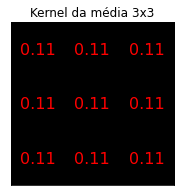

In [ ]:
kernel_media = np.zeros((3, 3))
kernel_media[:] = 1.0 / (len(kernel_media)**2)

imprime_kernel(kernel_media, 'Kernel da média 3x3') # 0.111... = 1/9

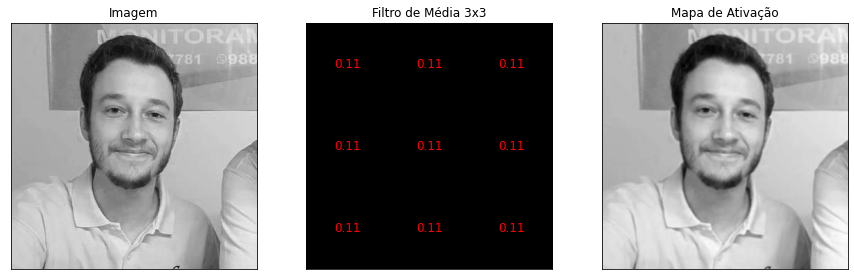

In [ ]:
resultado_media = convolve(img, kernel_media, mode='valid')
imprime(img, kernel_media, resultado_media, "Filtro de Média 3x3")

Como esse filtro é pequeno, apenas 3x3, temos um efeito de borrão leve. Aumentando o tamanho do filtro, temos um efeito mais forte:

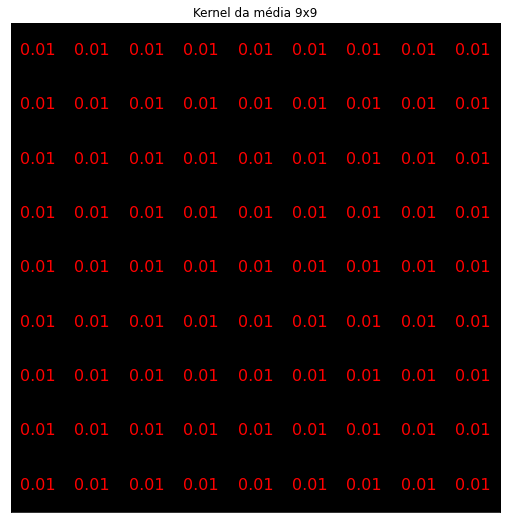

In [ ]:
kernel_media = np.zeros((9, 9))
kernel_media[:] = 1.0 / (len(kernel_media)**2)

imprime_kernel(kernel_media, 'Kernel da média 9x9') # 0.111... = 1/9

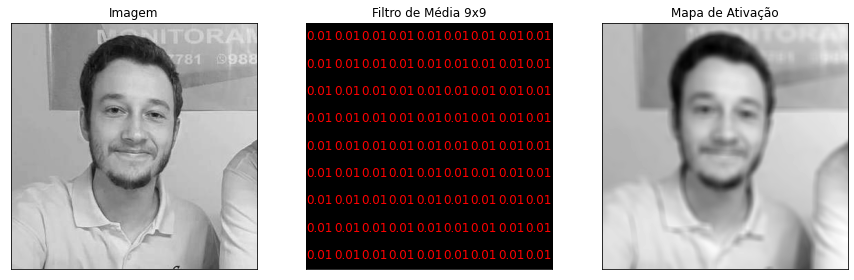

In [ ]:
resultado_media = convolve(img, kernel_media, mode='valid')
imprime(img, kernel_media, resultado_media, "Filtro de Média 9x9")

# Filtro de Sobel

Semelhante ao filtro de bordas, porém os vizinhos diretos do pixel central tem valor absoluto de maior intensidade.

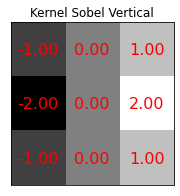

In [ ]:
# Filtro vertical
sobel_vertical = np.zeros((3,3))
sobel_vertical[:, 0] = -1 # todas as linhas da primeira coluna tem valor -1
sobel_vertical[:, 1] = 0 # todas as linhas da segunda coluna tem valor 0
sobel_vertical[:, 2] = 1 # todas as linhas da terceira coluna tem valor 1

# Vizinhos diretos do pixel central tem valor absoluto de maior intensidade:
sobel_vertical[1, [0, 2]] = [-2, 2] # leve ocorrência de bordas horizontais

imprime_kernel(sobel_vertical, "Kernel Sobel Vertical")

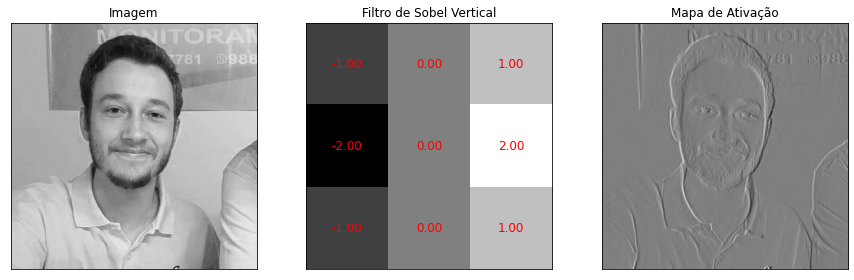

In [ ]:
resultado_sobel_v = convolve(img, sobel_vertical, mode='valid')
imprime(img, sobel_vertical, resultado_sobel_v, "Filtro de Sobel Vertical")

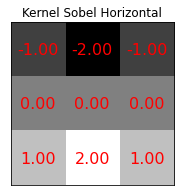

In [ ]:
# Filtro horizontal
sobel_horizontal = np.zeros((3,3))
sobel_horizontal[0, :] = -1 # todas as colunas da primeira linha tem valor -1
sobel_horizontal[1, :] = 0 # todas as colunas da segunda linha tem valor 0
sobel_horizontal[2, :] = 1 # todas as colunas da terceira linha tem valor 1

# Vizinhos diretos do pixel central tem valor absoluto de maior intensidade:
sobel_horizontal[[0, 2], 1] = [-2, 2] # leve ocorrência de bordas verticais

imprime_kernel(sobel_horizontal, "Kernel Sobel Horizontal")

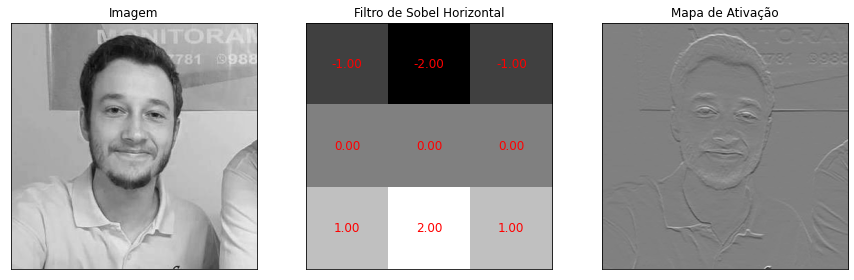

In [ ]:
resultado_sobel_h = convolve(img, sobel_horizontal, mode='valid')
imprime(img, sobel_horizontal, resultado_sobel_h, "Filtro de Sobel Horizontal")

# Filtro de Laplace

o filtro de Laplace também destaca bordas, porém diferente do filtro de Sobel, este filtro destaca igualmente bordas de diferentes direções.

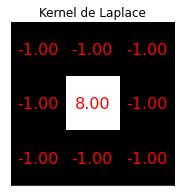

In [ ]:
kernel_laplace = np.ones((3, 3)) * -1 # Filtro todo preenchido de -1
kernel_laplace[1, 1] = 8              # Exceto na posição central, onde tem um valor mais positivo

imprime_kernel(kernel_laplace, "Kernel de Laplace")

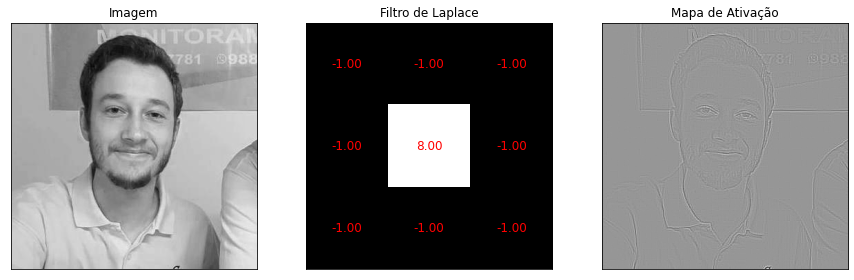

In [ ]:
resultado_laplace = convolve(img, kernel_laplace, mode='valid')
imprime(img, kernel_laplace, resultado_laplace, "Filtro de Laplace")

# Extra

Filtros convolucionais da primeira camada de uma CNN de reconhecimento de objetos, gerados através do aprendizado da própria rede:

https://cs231n.github.io/understanding-cnn/


Continua na parte 5.